# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\hp\Desktop\MachineLearning\mlworks\Laptop Price Prediction\Code Files\laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Preprocessing & EDA

In [4]:
# removing Unnamed column

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')   
      
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

### RAM and Weight

**Let's take `Ram` and `Weight` column, here I removed "GB" from `Ram` column and "kg" from `Weight` column and I converted weight as a float number and ram as an integer value.**

In [8]:
# using the str.replace(), removed 'GB' and 'kg'
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')


# converting from string->integer for ram column
df['Ram']=df['Ram'].astype('int')

# converting from string-> float for the weight column
df['Weight']=df['Weight'].astype('float32')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Screen Resolution

In [11]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

**For the `Screen Resolution` column we have many types of Screen Resolutions in the dataset as shown, here `Touch Screen`,  `No Touch Screen`, and `IPS Panel` are the 3 categories on the basis of which I can segregate the screen resolution.**

In [12]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

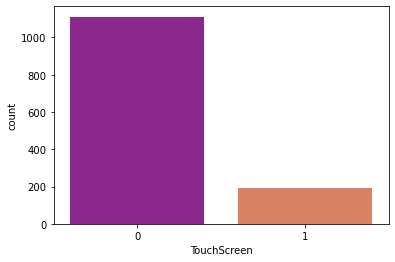

In [13]:
sns.countplot(df['TouchScreen'], palette = 'plasma')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

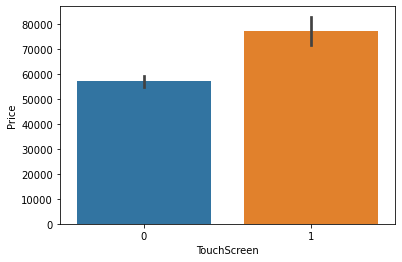

In [14]:
# touch screen on comparision with price of laptop

sns.barplot(x = df['TouchScreen'], y = df['Price'])

In [15]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS Panel'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0)

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS Panel', ylabel='count'>

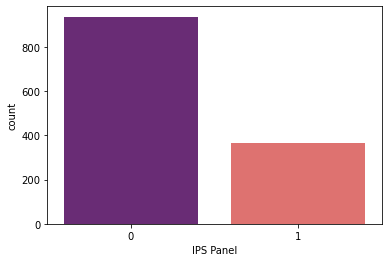

In [17]:
sns.countplot(df['IPS Panel'],palette='magma')

<AxesSubplot:xlabel='IPS Panel', ylabel='Price'>

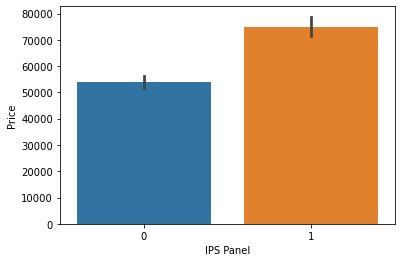

In [18]:
# price variation with respect to the IPS col

sns.barplot(x = df['IPS Panel'],y = df['Price'])

#### Extracting the X Resolution and the Y Resolution

In [19]:
# we will split the text at the "x" letter and seperate the 2 parts.
# from this we can observe that one of the col is Y_res and we need to do some feature engineering on the X_res column.

newdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
newdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [20]:
df['X_res'] = newdf[0]
df['Y_res'] = newdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [21]:
'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it, but the problem is the numbers are scattered 
in some cases, which is the reason why I am using regex.
So we find all numbers from the string as "\d+\.?\d+",\d means integer number and \.? 
all the numbers which come after a number and \d+ the string must end with number.


'''


df['X_res'] = df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [22]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


<AxesSubplot:>

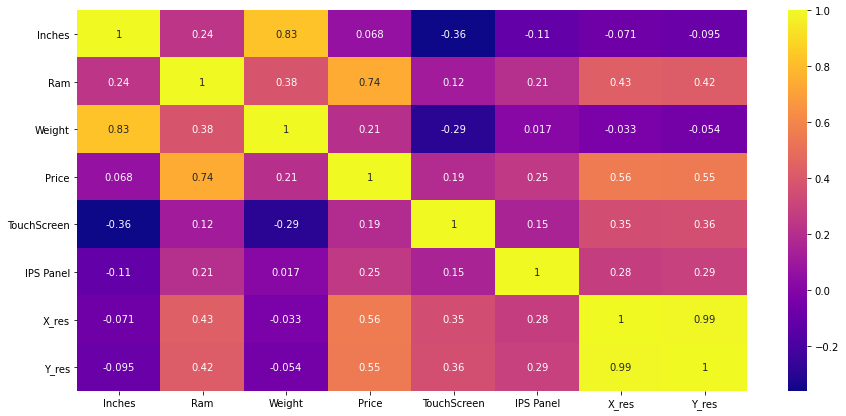

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [24]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS Panel      0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated.**

**from the correlation plot we can see that the `X_res and Y_res` are having much collinearity, therefore I combine them with `Inches` which is having less collinearity, and given below is the formula to calculate `PPI` {pixels per inch}.**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [25]:
df['PPI']=((((df['X_res'])**2+(df['Y_res'])**2)**0.5)/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
# variation of inches towards the price

sns.scatterplot(x = df['Inches'], y = df['Price'])

**Most of the data points cluster between 12 to 16 inches.**

**We have extracted all the valuable data from the screen resolution column and ,so we will drop `ScreenResolution, Inches, X_res, Y_res`.**

In [26]:
df.drop(['ScreenResolution','Inches','X_res','Y_res'],inplace=True,axis=1)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [27]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS Panel      0.252208
PPI            0.473487
Name: Price, dtype: float64

**Here we observe from the correlation data that the `PPI` is having good correlation,hence we will be using PPI instead of the 3 features which is a combination of the 3 features.**

### CPU

In [28]:
df['Cpu'].value_counts().head()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Name: Cpu, dtype: int64

In [29]:
CpuName=set(df['Cpu'].str.split(' ',expand=True)[0])
print(CpuName)

{'Intel', 'Samsung', 'AMD'}


**There are only three types of CPU's present in the dataset Intel, AMD, and Samsung. So, we categorise CPU as i3,i5,i7 intel processors or other intel processors, AMD processors, and Samsung processor.**

In [30]:
df['CpuName']=df['Cpu'].apply(lambda text:' '.join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [31]:
'''
If the intel processor belongs to i3,i5,i7 category then I have mentioned it as it is.
If the processor is of Intel but it does not belong to i3,i5,i7 then it is calssified as "Other Intel Processor".
Then there are two more categories which are Samsung and AMD processor.
'''

def processor(text):
    if text =='Intel Core i5' or text =='Intel Core i3' or text =='Intel Core i7':
        return text
    else:
        if text.split()[0]=='Samsung':
            return 'Samsung Processor'
        elif text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['CPU_Name']=df['CpuName'].apply(lambda text:processor(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CpuName,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [32]:
df.drop(['Cpu','CpuName'],inplace=True,axis=1)

In [33]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


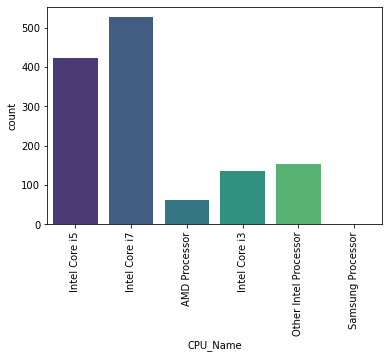

In [34]:
sns.countplot(df['CPU_Name'], palette = 'viridis')
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPU_Name', ylabel='count'>

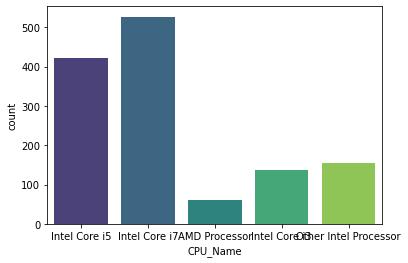

In [35]:
# since "Samsung Processor" is negligible compared to others, we remove the "Samsung Processor" tuple.

df = df[df['CPU_Name']!='Samsung Processor']
sns.countplot(df['CPU_Name'],palette='viridis')
plt.xticks(rotation = 'vertical')
plt.show()

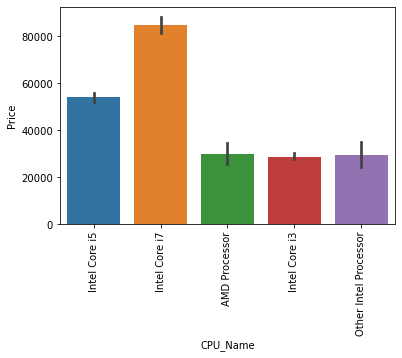

In [36]:
sns.barplot(x=df['CPU_Name'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Memory

**Now we sepearate memory into SSD and HDD. But before that I am going to convert TB into GB to keep the units consistent.**

In [37]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
64GB SSD                           1
1

In [38]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will become 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace GB with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace TB with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [39]:
# eliminate white space

df['x'] = newdf[0]
df['x'] = df['x'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,x
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [40]:
def xstorage(value):
    df['x'+value] = df['x'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    xstorage(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,x,xHDD,xSSD,xHybrid,xFlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [41]:
# remove all the characters just keep the numbers

df['x'] = df['x'].str.replace(r'\D','')
df['x'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       44
64       17
2000     16
16       10
180       5
8         1
240       1
508       1
Name: x, dtype: int64

In [42]:
# similarly, for the second layer
df['y'] = newdf[1]
df['y'] = df['y'].str.strip()

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,x,xHDD,xSSD,xHybrid,xFlashStorage,y
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [43]:
def ystorage(value):
    df['y'+value] = df['y'].apply(lambda y:1 if value in y else 0)

listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
df['y'] = df['y'].fillna("0")
for value in listtoapply:
    ystorage(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,...,x,xHDD,xSSD,xHybrid,xFlashStorage,y,yHDD,ySSD,yHybrid,yFlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [44]:
# remove all the characters just keep the numbers

df['y'] = df['y'].str.replace(r'\D','')
df['y'].value_counts()

0       1094
1000     187
2000      15
256        3
500        2
512        1
Name: y, dtype: int64

In [45]:
df['x'] = df['x'].astype('int')
df['y'] = df['y'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,...,x,xHDD,xSSD,xHybrid,xFlashStorage,y,yHDD,ySSD,yHybrid,yFlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [46]:
# Calculating HDD, SSD, Hybrid and Flash_Storage as a single column (i.e merging x and y column)


df['HDD']=(df['x']*df['xHDD']+df['y']*df['yHDD'])
df['SSD']=(df['x']*df['xSSD']+df['y']*df['ySSD'])
df['Hybrid']=(df['x']*df['xHybrid']+df['y']*df['yHybrid'])
df['FlashStorage']=(df['x']*df['xFlashStorage']+df['y']*df['yFlashStorage'])


## dropping the uncessary columns

df.drop(columns=['x', 'y', 'xHDD', 'xSSD', 'xHybrid', 'xFlashStorage', 'yHDD', 'ySSD', 'yHybrid', 'yFlashStorage'],inplace=True)

**Now, the `Memory` column is cleaned so we remove it from the dataset.**

In [47]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Hybrid,FlashStorage
190,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.42,150462.72,1,0,209.800683,Intel Core i7,0,1000,0,0
23,Dell,2 in 1 Convertible,8,Intel UHD Graphics 620,Windows 10,1.62,43636.32,1,0,165.632118,Intel Core i5,0,256,0,0
1056,HP,Notebook,4,Intel HD Graphics 620,No OS,1.96,26586.72,0,0,100.454670,Intel Core i5,500,0,0,0
613,Dell,Notebook,4,Intel HD Graphics 520,Linux,2.25,19127.52,0,0,100.454670,Intel Core i3,1000,0,0,0
114,Dell,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.21,86793.12,0,1,165.632118,Intel Core i5,0,256,0,0


In [48]:
df.corr()['Price']

Ram             0.742905
Weight          0.209867
Price           1.000000
TouchScreen     0.192917
IPS Panel       0.253320
PPI             0.475368
HDD            -0.096891
SSD             0.670660
Hybrid          0.007942
FlashStorage         NaN
Name: Price, dtype: float64

**Based on the correlation function we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [49]:
df.drop(columns = ['Hybrid','FlashStorage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


### GPU

In [50]:
df['Gpu'].value_counts().head()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
Name: Gpu, dtype: int64

In [51]:
Gpu_list = set(df['Gpu'].str.split(' ',expand=True)[0])
print(Gpu_list)

{'Intel', 'AMD', 'Nvidia'}


**Here we focus on `GPU brands` instead focusing on the values which are present there beside them,as it is shown above that there are 4 types of brands - "ARM", "Intel", "Nvidia", and "AMD".**

In [52]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_Brand', ylabel='count'>

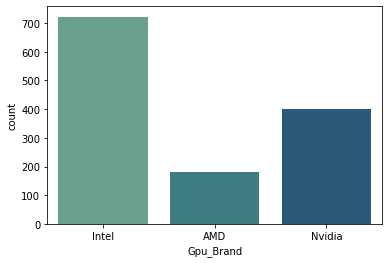

In [53]:
sns.countplot(df['Gpu_Brand'],palette='crest')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_Brand', ylabel='count'>

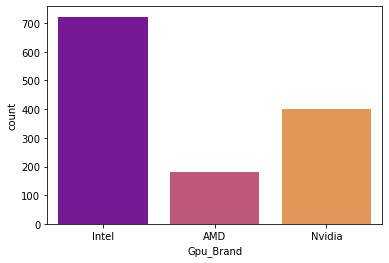

In [54]:
# since "ARM" is negligible compared to others, we remove the "ARM" tuple

df = df[df['Gpu_Brand']!='ARM']
sns.countplot(df['Gpu_Brand'],palette='plasma')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_Brand', ylabel='Price'>

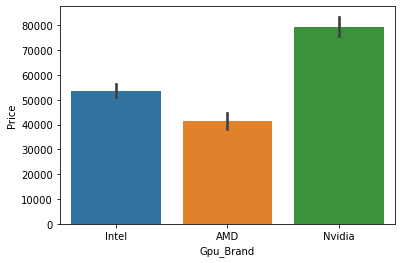

In [55]:
# price-GPU analysis,I used np.mean inorder to check if there is any impact of outlier or not.

sns.barplot(df['Gpu_Brand'],df['Price'],estimator=np.mean)

In [56]:
df.drop(['Gpu'],inplace=True,axis=1)

In [57]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### Operating System

In [58]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


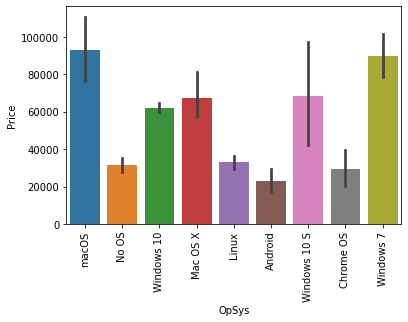

In [59]:
sns.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

**Here I converted "Windows 7", "Windows 10", and "Windows 10S" and take it as a "Windows" operating system, and "macOS" and "Mac OS X" as "Mac" based operating system and the remaining as "other" operating system.**

In [60]:
def opsys(sys):
    if sys == 'Windows 10 S' or sys == 'Windows 10' or sys == 'Windows 7':
        return 'Windows'
    else:
        if sys == 'macOS' or sys == 'Mac OS X':
            return 'Mac'
        else:
            return 'Other'

        
df['OpSys']=df['OpSys'].apply(lambda x:opsys(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

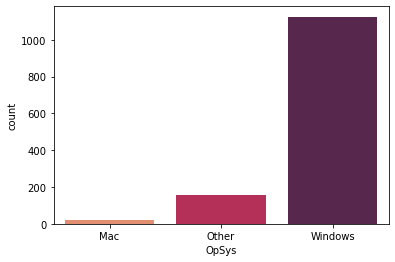

In [61]:
sns.countplot(df['OpSys'],palette='rocket_r')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

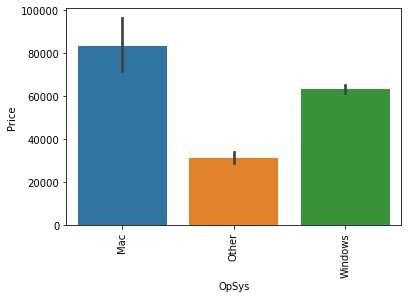

In [62]:
sns.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

### Weight

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

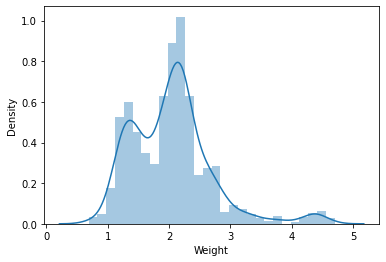

In [63]:
sns.distplot(df['Weight'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

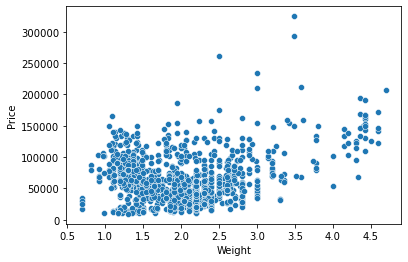

In [64]:
sns.scatterplot(df['Weight'],df['Price'])

### Price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

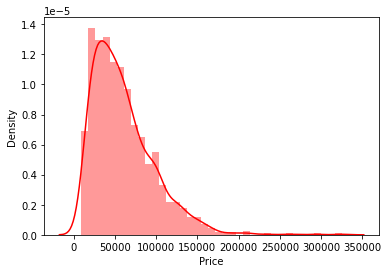

In [65]:
sns.distplot(df['Price'],color='red')

**We can see that the distribution is left skewed, hence I took log of Price of Laptop.**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

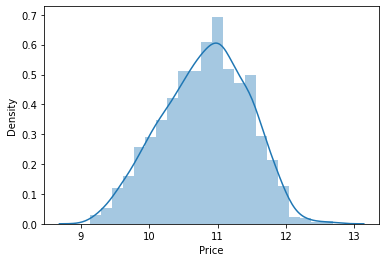

In [66]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(df['Price']))

<AxesSubplot:>

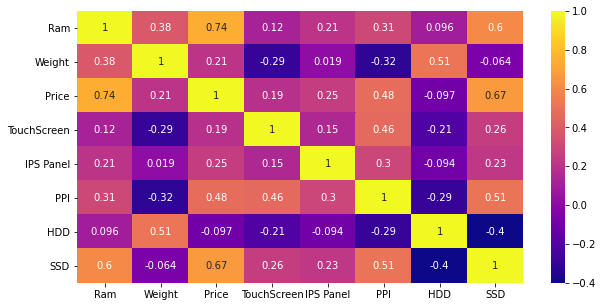

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

### EDA for Remaining Features

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

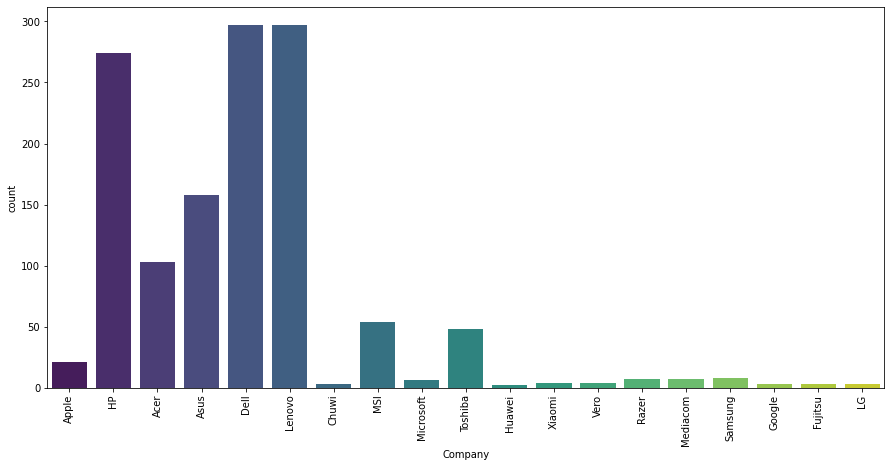

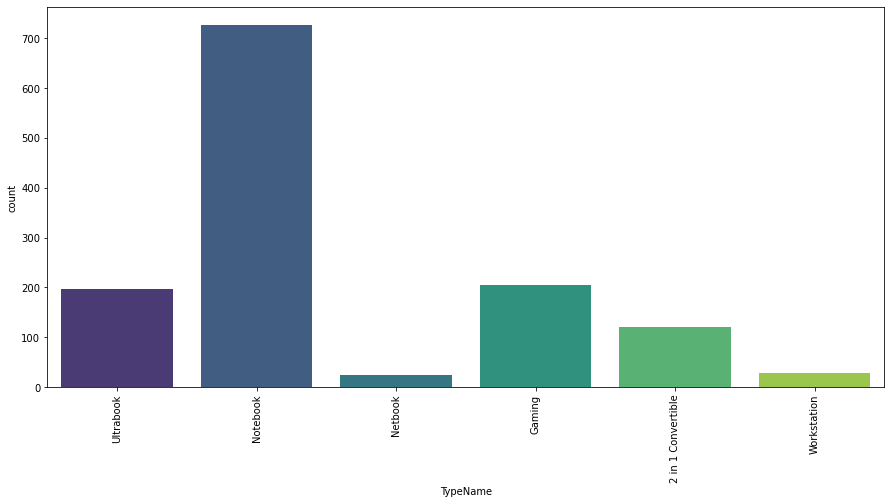

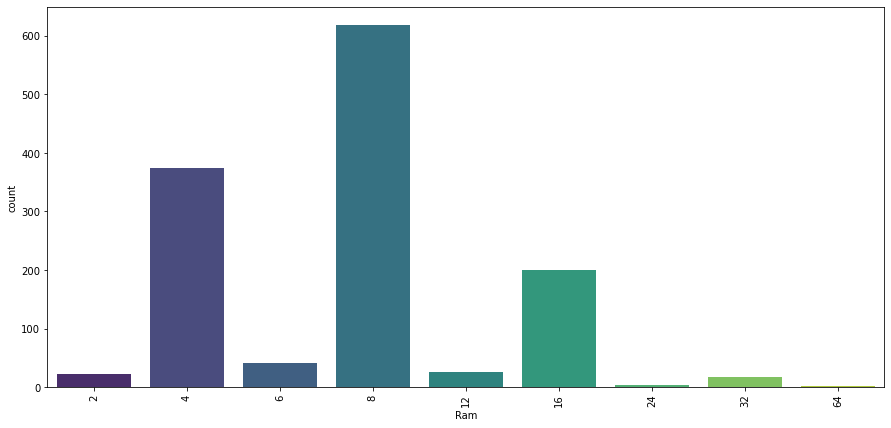

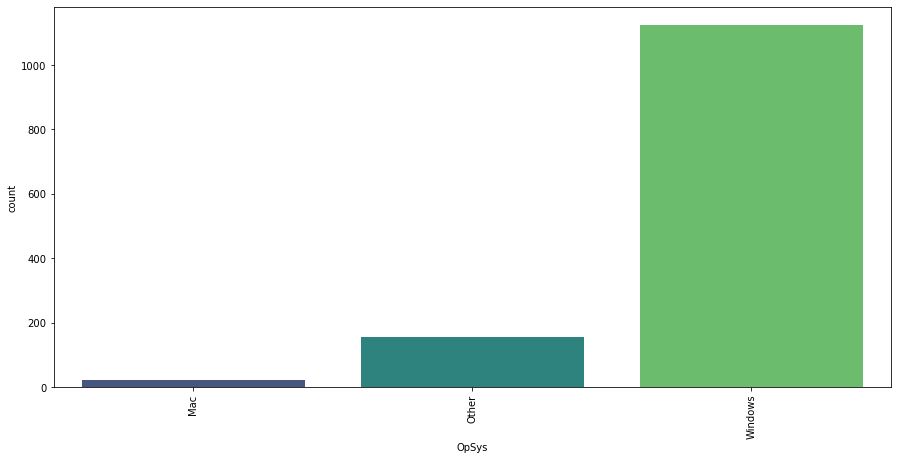

In [68]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='viridis')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

**Inference** - Lenovo, Dell, and HP are the most bought laptop in the dataset. Most users prefer Notebook model with 8 GB Ram and Windows 10 operating system.

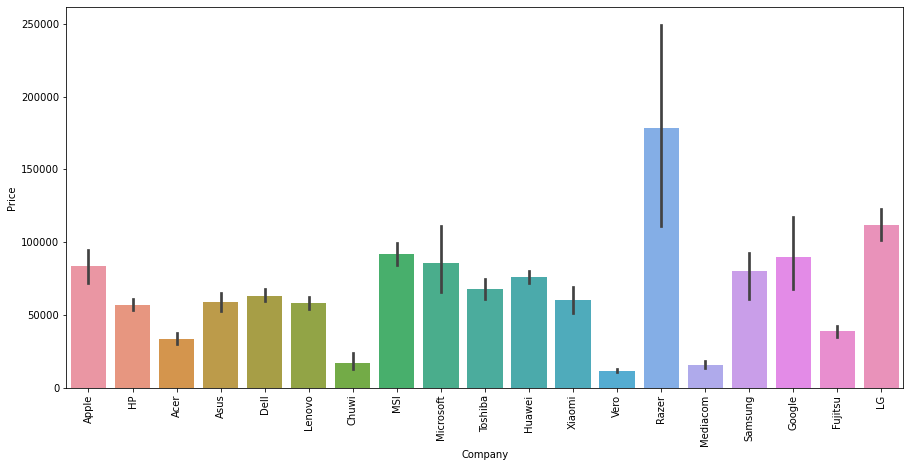

In [69]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sns.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

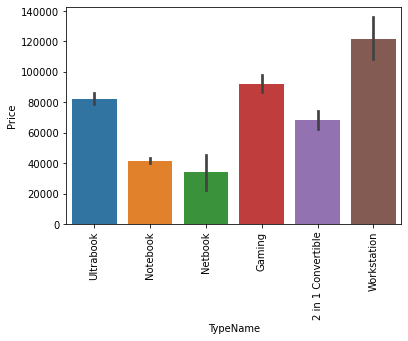

In [70]:
# laptop type and variation about the price 

sns.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

**We have preprocessed the data and the dataset is now ready for building model.**

# Model Building

In [72]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)

In [73]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state = 2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

**We have imported `Column Transformer` Class, therefore we will transform the columns in the training set and build our models using `Pipelines`, so for this we have to get the index numbers of the columns which are having categorical variables.**

In [76]:
# We have done hash mapping to give indices to columns.

mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS Panel',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu_Brand'}

## Linear Regression

In [77]:
# We will apply one hot encoding on the columns with indices -- [0, 1, 3, 8, 11].
# We will keep the reamianing columns as it is. 

ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 3, 8, 11])], remainder = 'passthrough')

lr = LinearRegression()

pipe = Pipeline([
    ('ct',ct),
    ('lr',lr)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418437
MAE 0.21017827976429154


## Ridge Regression

In [78]:
ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1, 3, 8, 11])], remainder='passthrough')

rr = Ridge(alpha = 10)

pipe = Pipeline([('ct',ct), ('rr',rr)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2_score: 0.8127331031311809
MAE: 0.20926802242582962


## Lasso Regression

In [79]:
ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1, 3, 8, 11])], remainder='passthrough')

lr = Lasso(alpha = 0.001)

pipe = Pipeline([('ct',ct), ('lr',lr)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2_score: 0.8071857196899418
MAE: 0.2111435071691317


## Decision Tree

In [80]:
ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1, 3, 8, 11])], remainder='passthrough')

dtr = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([('ct', ct), ('dtr', dtr)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2_score: 0.8473737109404726
MAE: 0.1794867903743722


## Random Forest

In [81]:
ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1, 3, 8, 11])], remainder='passthrough')

rfr = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([('ct', ct), ('rfr', rfr)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2_score: 0.8840242410385177
MAE: 0.15974965172059183


## Support Vector Regressor

In [84]:
ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1, 3, 8, 11])], remainder='passthrough')

svr = SVR()

pipe = Pipeline([('ct', ct), ('svr', svr)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2_score: 0.6110751844196867
MAE 0.29589619896781777


## K-Neighbors Regressor

In [85]:
ct = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1, 3, 8, 11])], remainder='passthrough')

knr = KNeighborsRegressor()

pipe = Pipeline([('ct', ct), ('knr', knr)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2_score: 0.8008997186190645
MAE 0.20073063291501797


**Since the Random Forest algorithm is more accurate, we will tune its hyperparameters.**

In [86]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [87]:
# save train data without index

train.to_csv('traineddata.csv',index=None)

### Hyperparameter Tuning for Random Forest

In [88]:
indexlist = [0, 1, 3, 8, 11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_Name', 'Gpu_Brand']

In [89]:
train = pd.get_dummies(train, columns = transformlist, drop_first = True)
train.head()

,Ram,Weight,TouchScreen,IPS Panel,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Processor,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=2)

X_train.shape, X_test.shape

((1106, 38), (196, 38))

[Text(434.7535615670393, 478.60434782608695, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(197.29260701854207, 457.3330434782609, 'CPU_Name_Other Intel Processor <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(130.012151081063, 436.0617391304348, 'CPU_Name_Intel Core i5 <= 0.5\nmse = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(87.3165974964857, 414.7904347826087, 'CPU_Name_Intel Core i7 <= 0.5\nmse = 0.08\nsamples = 154\nvalue = 10.233'),
 Text(37.29773746569382, 393.5191304347826, 'Weight <= 1.645\nmse = 0.07\nsamples = 135\nvalue = 10.183'),
 Text(6.693460070955218, 372.24782608695654, 'TypeName_Ultrabook <= 0.5\nmse = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(4.781042907825156, 350.9765217391304, 'Weight <= 1.395\nmse = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(3.8248343262601243, 329.70521739130436, 'mse = 0.0\nsamples = 1\nvalue = 10.208'),
 Text(5.737251489390187, 329.70521739130436, 'Company_Lenovo <= 0.5\nmse = 0.011\nsamples = 7\nvalue = 10.

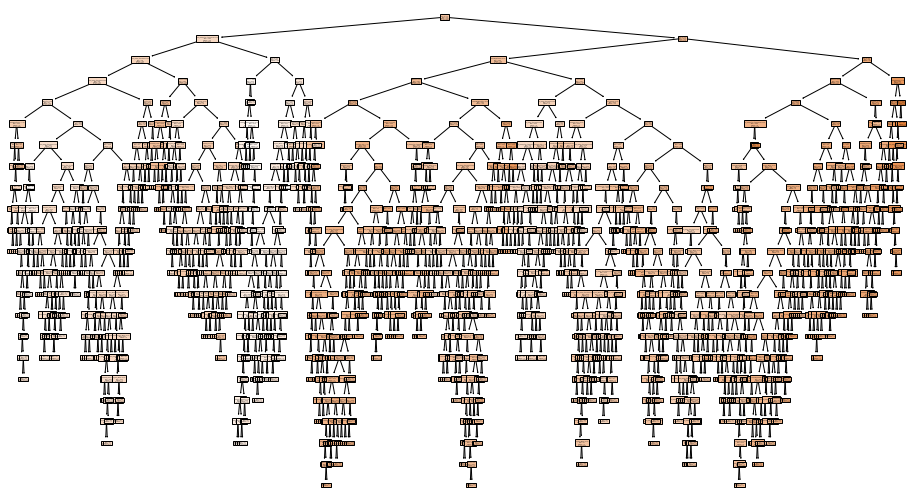

In [91]:
reg = DecisionTreeRegressor(random_state = 0)
reg.fit(X_train, y_train)
plt.figure(figsize = (16,9))
tree.plot_tree(reg,filled = True, feature_names = train.columns)

**The above Decision Tree plot is very complicated, which may lead to overfitting. Therefore we have to do pruning on this Decision Tree.**

In [92]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [93]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(X_train, y_train)
    alphalist.append(reg)

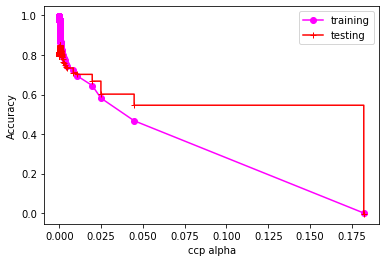

In [94]:
train_score = [reg.score(X_train, y_train) for reg in alphalist]
test_score = [reg.score(X_test, y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o', label = 'training', color = 'magenta')

plt.plot(ccp_alphas,test_score,marker = '+', label = 'testing', color = 'red', drawstyle = 'steps-post')
plt.legend()
plt.show()

**The value of ccp alpha is at the point where testing score rapidly decreases. Possible values of alpha can lie between `[0.0025 - 0.025]`.**

[Text(446.4, 440.31600000000003, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(223.2, 342.468, 'CPU_Name_Other Intel Processor <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(111.6, 244.62, 'mse = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(334.79999999999995, 244.62, 'mse = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(669.5999999999999, 342.468, 'Ram <= 14.0\nmse = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(558.0, 244.62, 'TypeName_Notebook <= 0.5\nmse = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(446.4, 146.772, 'mse = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(669.5999999999999, 146.772, 'PPI <= 114.881\nmse = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(558.0, 48.924000000000035, 'mse = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(781.1999999999999, 48.924000000000035, 'mse = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(781.1999999999999, 244.62, 'mse = 0.12\nsamples = 191\nvalue = 11.558')]

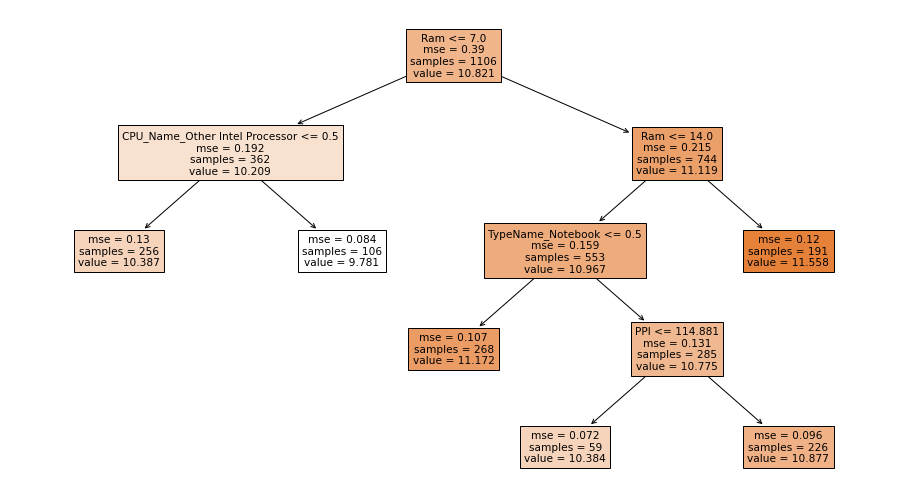

In [95]:
reg = DecisionTreeRegressor(random_state = 0, ccp_alpha = 0.0085)
reg.fit(X_train, y_train)
plt.figure(figsize = (16,9))
tree.plot_tree(reg,filled = True, feature_names = train.columns)

In [96]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [97]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions = mp['params'],cv = 5,
                            n_iter = 10, scoring = 'neg_mean_squared_error', verbose = 2)
    clf.fit(X_train, y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01, total=   3.3s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01, total=   3.5s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01 
[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01, total=   3.2s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01 
[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01, total=   3.5s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01 
[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=mae, ccp_alpha=0.01, total=   3.5s
[CV] n_estimators=100, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.0075 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=1, criterion=mae, ccp_alpha=0.007

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=10, min_samples_leaf=14, max_features=auto, max_depth=30, criterion=mae, ccp_alpha=0.01, total=   0.1s
[CV] min_samples_split=10, min_samples_leaf=14, max_features=auto, max_depth=30, criterion=mae, ccp_alpha=0.01 
[CV]  min_samples_split=10, min_samples_leaf=14, max_features=auto, max_depth=30, criterion=mae, ccp_alpha=0.01, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=14, max_features=auto, max_depth=30, criterion=mae, ccp_alpha=0.01 
[CV]  min_samples_split=10, min_samples_leaf=14, max_features=auto, max_depth=30, criterion=mae, ccp_alpha=0.01, total=   0.1s
[CV] min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, criterion=mse, ccp_alpha=0.0075 
[CV]  min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, criterion=mse, ccp_alpha=0.0075, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, criterion=mse, ccp_alpha=0.0075 
[CV]  min_samples_split=2, min_samples_le

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


In [98]:
scores_df = pd.DataFrame(scores, columns = ['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.070999,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,Decision Tree,-0.094662,"DecisionTreeRegressor(ccp_alpha=0.005, criteri..."


In [99]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.07099913348319727,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=22,
                        max_features='log2', min_samples_leaf=2,
                        min_samples_split=14, n_estimators=222)},
 {'model_name': 'Decision Tree',
  'best_score': -0.09466171354689881,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mae', max_depth=30,
                        max_features='auto', min_samples_leaf=10)}]

In [110]:
rfr = RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=22,
                        max_features='log2', min_samples_leaf=2,
                        min_samples_split=14, n_estimators=222)

rfr.fit(X_train, y_train)
ypred = rfr.predict(X_test)
print('R2_score:',metrics.r2_score(y_test, y_pred))

R2_score: 0.8008997186190645


## Prediction on the whole Dataset

In [111]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rfr.predict([testtrain[i]]))
    
predicted

[array([11.14691142]),
 array([10.91490693]),
 array([10.69699101]),
 array([11.46279411]),
 array([11.21005435]),
 array([10.17645431]),
 array([11.179574]),
 array([10.91490693]),
 array([11.45768112]),
 array([11.05932095]),
 array([10.26081443]),
 array([10.1594674]),
 array([11.4139265]),
 array([10.35050944]),
 array([11.16544544]),
 array([11.21005435]),
 array([10.9095319]),
 array([11.46279411]),
 array([10.40296982]),
 array([11.12522214]),
 array([9.81662397]),
 array([10.93746249]),
 array([10.10294438]),
 array([11.0395311]),
 array([11.14123989]),
 array([10.19328468]),
 array([10.91490693]),
 array([10.82341934]),
 array([11.21972037]),
 array([10.66783462]),
 array([9.87141267]),
 array([10.12797616]),
 array([10.29146232]),
 array([11.48480375]),
 array([10.91490693]),
 array([9.80071848]),
 array([10.08517916]),
 array([10.78554769]),
 array([10.42370431]),
 array([10.84678603]),
 array([10.139356]),
 array([11.403642]),
 array([10.44336201]),
 array([10.63158865]),
 

In [112]:
# as we transformed our price variable to np.log, we have to transform it from np.log to np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [113]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Gpu_Brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,69349.306051
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,54990.016485
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,44222.589351
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,95110.448082
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,73869.429433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,48609.225338
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,97311.403226
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17256.047546
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,35120.315093


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


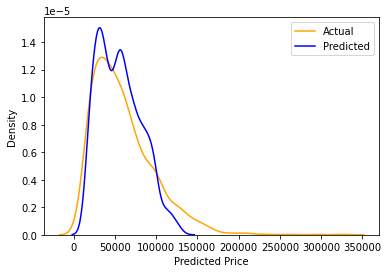

In [114]:
sns.distplot(df['Price'], hist = False, color = 'orange', label = 'Actual')
sns.distplot(df['Predicted Price'], hist = False, color = 'blue', label = 'Predicted')
plt.legend()
plt.show()

**We can see that there is huge difference between the actual and predicted values. Hence we willl not consider the estimator values found in score.
Therefore, I created a new instance for the Random Forest Regressor with 100 estimators.**

## Random Forest Regressor version_2

In [115]:
rfr1 = RandomForestRegressor(n_estimators = 100, random_state = 3, max_samples = 0.5, max_features = 0.75, max_depth = 15)

rfr1.fit(X_train, y_train)
print(f'R2_score: {metrics.r2_score(y_test,rfr1.predict(X_test))}')

R2_score: 0.8876880244703835


In [116]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rfr1.predict([testtrain[i]]))
    
predicted

[array([11.19759753]),
 array([10.88685941]),
 array([10.55486954]),
 array([11.81830692]),
 array([11.323749]),
 array([9.90337574]),
 array([11.48361478]),
 array([10.88685941]),
 array([11.43064625]),
 array([10.7937262]),
 array([10.21313312]),
 array([9.94246035]),
 array([11.75252033]),
 array([10.27689791]),
 array([11.17575361]),
 array([11.323749]),
 array([10.73787482]),
 array([11.81830692]),
 array([10.31031744]),
 array([11.04783216]),
 array([9.48342539]),
 array([10.8716748]),
 array([9.72510244]),
 array([10.80365165]),
 array([10.86423233]),
 array([10.08025514]),
 array([10.91929899]),
 array([10.68535509]),
 array([11.17269281]),
 array([10.75716527]),
 array([9.62757403]),
 array([9.92493055]),
 array([10.14530589]),
 array([11.64094302]),
 array([10.91929899]),
 array([9.60902556]),
 array([9.93786832]),
 array([10.88480385]),
 array([10.32972776]),
 array([10.76999837]),
 array([10.0170042]),
 array([11.27470877]),
 array([10.35517012]),
 array([10.54713492]),
 ar

In [117]:
# as we transformed our price variable to np.log, we have to transform it from np.log to np.exp inorder to get the result.

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [118]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_Name,HDD,SSD,Gpu_Brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,72954.959187
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,53469.111472
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,38363.798401
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,135714.258702
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,82764.044180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36457.409553
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,87623.187293
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,12778.590180
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,38074.548690


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


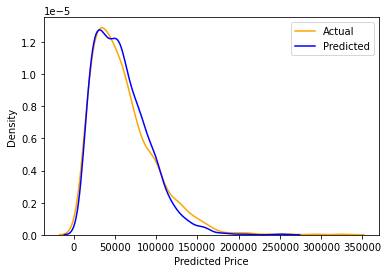

In [119]:
sns.distplot(data['Price'], hist = False, color = 'orange', label = 'Actual')
sns.distplot(data['Predicted Price'], hist = False, color = 'blue', label = 'Predicted')
plt.legend()
plt.show()

**The model is ready to be deployed on any cloud platform.**